Sklearn Logistic Regression with Tf-Idf vectorization

In [3]:
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from collections import Counter
import numpy as np
import operator
import nltk
import math
from scipy.stats import norm
import jieba
import regex as re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd "/content/drive/MyDrive/Info 159 Notebooks/Annotation Project - Leiden Weibo Corpus/AP4"

/content/drive/MyDrive/Info 159 Notebooks/Annotation Project - Leiden Weibo Corpus/AP4


In [6]:
stopwords_file = "stopwords-zh.txt"
stopwords = set(line.strip() for line in open(stopwords_file))
print(stopwords)

{'还是', '替', '那么些', '根据', '９', '乃', '若', '呵', '总而言之', '比方', '鄙人', '六', '之一', '出于', '人家', '接着', '此', '然而', '已矣', '由是', '般的', '难道说', '若是', '当着', '打', '他们', '无论', '非独', '乘', '至若', '照', '莫不然', '咧', '相对而言', '要不然', '本着', '关于具体地说', '如上所述', '反过来说', '故', '加之', '自从', '那般', '、', '如何', '其余', '要不是', '进而', '除外', '才能', '得', '恰恰相反', '＆', '＄', '一些', '》', '为何', '这么样', '哪', '这些', '上', '时', '七', '趁着', '几时', '便于', '咋', '乎', '吧', '尔', '有时', '五', '只当', '么', '矣', '吱', '彼时', '虽则', '关于', '零', '阿', '秒', '宁', '和', '倘或', '尚且', '他', '哎', '，', '不拘', '不尽然', '能否', '不只', '那会儿', '把', '为', '不妨', '以至于', '何况', '哉', '沿着', '欤', '漫说', '我们', '这', '犹自', '除此之外', '哈哈', '人', '为此', '矣乎', '这会儿', '不成', '这么', '个别', '呢', '一切', '之所以', '由此', '在于', '经', '像', '除', '那', '据此', '不料', '怎', '该', '综上所述', '跟', '呗', '不过', '顺着', '所在', '做', '别人', '有关', '与其说', '省得', '全体', '光', '多', '甚么', '不仅', '甚或', '哼', '以期', '即令', '如此', '同时', '既然', '那些', '怎奈', '靠', '即或', '一般', '＜', '随着', '假若', '呃', '嗡嗡', '有的', '一种', '比', '哎哟', '另悉', '她们', '顺', '二来', '同', '她', '至', '

In [7]:
def load_data(filename):
    X = []
    Y = []
    with open(filename, encoding="utf-8") as file:
        for line in file:
            cols = line.split("\t")
            idd = cols[0]
            label = cols[2].lstrip().rstrip()
            text = cols[3]

            X.append(text)
            Y.append(label)

    return X, Y

def analyzer(text):
    text = "".join([n for n in re.findall(r'[\u4e00-\u9fff]+', text)])
    # text = "".join([n for n in text if n not in stopwords])
    text = jieba.lcut(text)
    return text

def confidence_intervals(accuracy, n, significance_level):
    critical_value=(1-significance_level)/2
    z_alpha=-1*norm.ppf(critical_value)
    se=math.sqrt((accuracy*(1-accuracy))/n)
    return accuracy-(se*z_alpha), accuracy+(se*z_alpha)

In [8]:
tf_idf = TfidfVectorizer(analyzer = analyzer)
trainingFile = "./splits/train.txt"
devFile = "./splits/dev.txt"
testFile = "./splits/test.txt"

trainX, trainY = load_data(trainingFile)
devX, devY = load_data(devFile)
testX, testY = load_data(testFile)

trainX = tf_idf.fit_transform(trainX)
devX = tf_idf.transform(devX)
testX = tf_idf.transform(testX)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.729 seconds.
DEBUG:jieba:Loading model cost 0.729 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [9]:
print(tf_idf.vocabulary_)

{'为什么': 138, '每次': 1461, '不': 78, '在': 693, '中国': 130, '都': 2165, '会': 255, '他们': 235, '家': 880, '田鸡': 1670, '爱喝': 1601, '乙醇': 167, '的': 1705, '甲醇': 1672, '小妞': 899, '曼陀罗': 1358, '你': 280, '厉害': 474, '蛋糕': 1959, '吃': 531, '好': 794, '一': 0, '屁股': 926, '坐': 705, '我': 1133, '笔记本': 1793, '上': 59, '分享': 387, '图片': 687, '一把': 30, '年纪': 976, '了': 178, '到': 408, '哪儿': 621, '还': 2109, '抱': 1181, '着': 1740, '她': 793, '玩具狗': 1634, '刚刚': 396, '绑定': 1837, '手机': 1152, '获得': 1946, '如来': 811, '神掌': 1764, '勋章': 439, '微博': 1032, '已经': 945, '尽': 924, '掌中': 1225, '也': 170, '想练': 1113, '成此': 1129, '神功': 1763, '快': 1062, '来': 1409, '吧': 558, '喝': 641, '爷爷': 1606, '换': 1220, '杯子': 1416, '喝水': 644, '被': 1979, '熏得': 1596, '有股': 1386, '淡淡的': 1549, '檀': 1439, '香味': 2299, '时': 1313, '又': 485, '回忆起': 672, '小': 896, '时候': 1315, '那种': 2159, '感觉': 1119, '真': 1729, '做': 303, '十大': 450, '劲歌': 438, '金曲': 2181, '颁奖礼': 2273, '支持': 1254, '林峰': 1421, '拿大奖': 1202, '参加': 484, '投票': 1176, '杨幂': 1415, '刘恺威': 392, '公开': 342, '恋情

In [11]:
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000]
best_score = 0.
best_model = None
for C in Cs:
    log_reg = LogisticRegression(C=C, class_weight='balanced', max_iter=10000, random_state=159)
    model = log_reg.fit(trainX, trainY)
    score = log_reg.score(devX, devY)
    if score > best_score:
        best_model = model
        best_score = score
test_score = best_model.score(testX, testY)
print(test_score)

0.43


In [12]:
print(best_model.get_params())
lower, upper=confidence_intervals(test_score, len(testY), .95)
print(lower, test_score, upper)

{'C': 1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 159, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.3329669356893162 0.43 0.5270330643106838


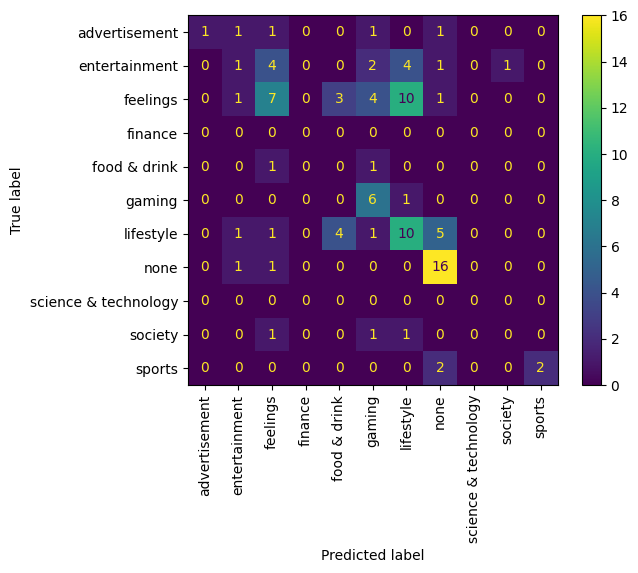

In [13]:
ConfusionMatrixDisplay.from_estimator(best_model, testX, testY, labels=best_model.classes_, xticks_rotation='vertical')

In [14]:
reverse_vocab=[None]*len(best_model.coef_[0])
for k in tf_idf.vocabulary_:
    reverse_vocab[tf_idf.vocabulary_[k]]=k
for i, cat in enumerate(best_model.classes_):

    weights=best_model.coef_[i]

    for feature, weight in list(reversed(sorted(zip(reverse_vocab, weights), key = operator.itemgetter(1))))[:10]:
        print("%s\t%.3f\t%s" % (cat, weight, feature))
    print()

advertisement	1.031	微博
advertisement	1.000	推荐
advertisement	0.881	活动
advertisement	0.656	客户端
advertisement	0.650	大家
advertisement	0.617	这个
advertisement	0.544	投票
advertisement	0.543	裤
advertisement	0.524	设计
advertisement	0.524	宣传册

entertainment	0.703	人品
entertainment	0.553	罗斯福
entertainment	0.553	看过
entertainment	0.553	滴水之恩
entertainment	0.553	挑战赛
entertainment	0.517	原来
entertainment	0.502	加入
entertainment	0.492	寂寞
entertainment	0.472	爆料
entertainment	0.469	测试

feelings	0.538	自己
feelings	0.505	是
feelings	0.475	抓狂
feelings	0.411	可怜
feelings	0.407	人
feelings	0.400	你
feelings	0.328	开心
feelings	0.315	当
feelings	0.309	要
feelings	0.308	累不累

finance	1.832	高开
finance	1.832	股市
finance	1.832	利好
finance	1.538	出
finance	1.422	明天
finance	1.296	经济
finance	1.296	沙龙
finance	1.296	李易
finance	1.296	录制
finance	1.296	孔

food & drink	0.925	泡面
food & drink	0.838	做
food & drink	0.705	馋嘴
food & drink	0.678	料理
food & drink	0.664	抓狂
food & drink	0.607	重要
food & drink	0.554	晕
food & drink	0.538	鸡翅
food & drink	

In [15]:
scores = f1_score(testY, best_model.predict(testX), labels=best_model.classes_, average=None, zero_division=0)
for i, cl in enumerate(best_model.classes_):
    print(f"{cl}: {scores[i]}")
print("overall weighted: %f" % f1_score(testY, best_model.predict(testX), labels=best_model.classes_, average='weighted', zero_division=0))

advertisement: 0.33333333333333337
entertainment: 0.1111111111111111
feelings: 0.33333333333333337
finance: 0.0
food & drink: 0.0
gaming: 0.5217391304347825
lifestyle: 0.41666666666666663
none: 0.7272727272727274
science & technology: 0.0
society: 0.0
sports: 0.6666666666666666
overall weighted: 0.403542


Majority Class

In [112]:
from sklearn.dummy import DummyClassifier

In [113]:
trainingFile = "./splits/train.txt"
devFile = "./splits/dev.txt"
testFile = "./splits/test.txt"

trainX, trainY = load_data(trainingFile)
devX, devY = load_data(devFile)
testX, testY = load_data(testFile)

clf = DummyClassifier(strategy='most_frequent', random_state=159)
clf.fit(trainX, trainY)
majority_class = clf.score(trainX, trainY)
dev_score = clf.score(devX, devY)
test_score = clf.score(testX, testY)
print(f"majority class: {majority_class}, dev accuracy: {dev_score}, test accuracy: {test_score}")

majority class: 0.24666666666666667, dev accuracy: 0.23, test accuracy: 0.22


In [114]:
lower, upper=confidence_intervals(test_score, len(testY), .95)
print(lower, test_score, upper)

0.13880921643246003 0.22 0.30119078356754


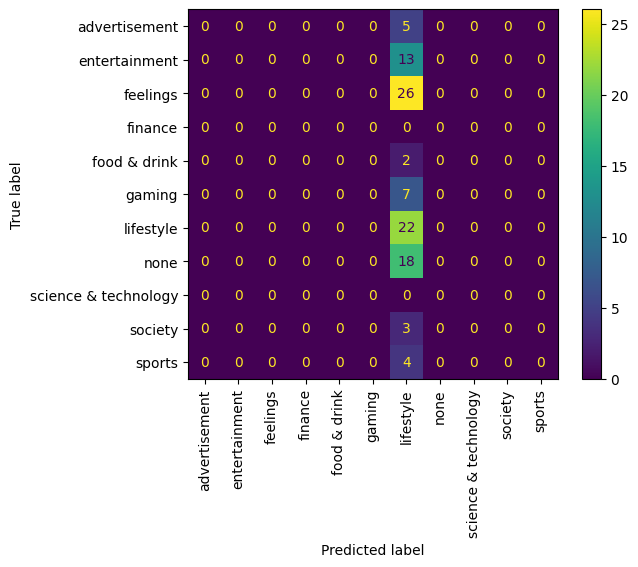

In [116]:
ConfusionMatrixDisplay.from_estimator(clf, testX, testY, labels=best_model.classes_, xticks_rotation='vertical')

TextCNN

In [1]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393275 sha256=17127eb85bf8e75bfa7c63591eaddf654ce398be931b235e0e851da8432f7027
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [16]:

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

from collections import Counter
import jieba
import regex as re
import fasttext.util
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
import numpy as np

import random
from scipy.stats import norm
import math

In [17]:
%cd "/content/drive/MyDrive/Annotation Project - Leiden Weibo Corpus/AP4"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Annotation Project - Leiden Weibo Corpus/AP4'
/content/drive/MyDrive/Info 159 Notebooks/Annotation Project - Leiden Weibo Corpus/AP4


In [18]:
# uncomment the following line if its the first time downloading the fasttext model
# fasttext.util.download_model('zh', if_exists='ignore')
ft = fasttext.load_model('cc.zh.300.bin')

In [19]:
def tokenizer(text):
    text = "".join([n for n in re.findall(r'[\u4e00-\u9fff]+', text)])
    text = jieba.lcut(text)
    return text

def load_data(filename):
    X = []
    Y = []
    with open(filename, encoding="utf-8") as file:
        for line in file:
            cols = line.split("\t")
            idd = cols[0]
            label = cols[2].lstrip().rstrip()
            text = cols[3]

            X.append(text)
            Y.append(label)

    return X, Y
def confidence_intervals(accuracy, n, significance_level):
    critical_value=(1-significance_level)/2
    z_alpha=-1*norm.ppf(critical_value)
    se=math.sqrt((accuracy*(1-accuracy))/n)
    return accuracy-(se*z_alpha), accuracy+(se*z_alpha)


In [20]:
trainingFile = "./splits/train.txt"
devFile = "./splits/dev.txt"
testFile = "./splits/test.txt"

trainX, trainY = load_data(trainingFile)
devX, devY = load_data(devFile)
testX, testY = load_data(testFile)

trainX = list(map(tokenizer, trainX))
devX = list(map(tokenizer, devX))
testX = list(map(tokenizer, testX))

vocab = Counter([word for sentence in trainX for word in sentence])
vocab_size = len(vocab)
print(vocab_size)
print(vocab)
print(trainX)

2348
Counter({'的': 263, '了': 182, '我': 131, '你': 93, '是': 74, '在': 61, '啊': 43, '都': 37, '有': 35, '就': 32, '也': 27, '不': 26, '吧': 26, '人': 24, '自己': 23, '又': 22, '看': 22, '要': 22, '来': 21, '吃': 19, '好': 19, '小': 17, '和': 17, '说': 16, '去': 16, '什么': 16, '分享': 15, '微博': 15, '很': 14, '中': 14, '一个': 14, '可以': 14, '他': 14, '一': 13, '还': 13, '获得': 13, '想': 13, '给': 13, '大家': 13, '就是': 12, '游戏': 12, '多': 12, '偷笑': 12, '上': 11, '么': 11, '还是': 11, '起来': 11, '一起': 11, '开心': 11, '到': 10, '着': 10, '三国': 10, '今天': 10, '能': 10, '当': 10, '快': 9, '真是': 9, '太': 9, '这个': 9, '才': 9, '呢': 9, '推荐': 9, '现在': 9, '没': 9, '让': 9, '那么': 9, '没有': 9, '这': 9, '会': 8, '她': 8, '刚刚': 8, '时': 8, '啦': 8, '开始': 8, '吗': 8, '微': 8, '最': 8, '地址': 8, '呀': 8, '等': 8, '抓狂': 8, '图片': 7, '勋章': 7, '被': 7, '感觉': 7, '做': 7, '那': 7, '个': 7, '过': 7, '大': 7, '活动': 7, '人家': 7, '老': 7, '明天': 7, '更': 7, '哦': 7, '为': 7, '你们': 7, '但': 7, '超过': 7, '不能': 7, '不是': 7, '可怜': 7, '西瓜': 7, '啥': 7, '绑定': 6, '手机': 6, '真的': 6, '像': 6, '上海': 6, '跟': 

In [21]:
def tokens_to_embeddings(tokens, vocab=vocab, ft=ft, embedding_dim=300, max_tokens=200):
    embeddings = []
    for i in range(max_tokens):
        if i < len(tokens):
            if tokens[i] in vocab.keys():
                embeddings.append(ft.get_word_vector(tokens[i]))
            else:
                embeddings.append(np.random.rand(embedding_dim))
        else:
            embeddings.append(np.zeros(embedding_dim))
    return np.array(embeddings)

In [22]:
trainX = np.array(list(map(tokens_to_embeddings, trainX)))
devX = np.array(list(map(tokens_to_embeddings, devX)))
testX = np.array(list(map(tokens_to_embeddings, testX)))

In [23]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
devY = le.transform(devY)
testY = le.transform(testY)

In [24]:
print(le.classes_)
print(len(le.classes_))

['advertisement' 'entertainment' 'feelings' 'finance' 'food & drink'
 'gaming' 'lifestyle' 'none' 'science & technology' 'society' 'sports']
11


In [25]:
print(trainY)

[ 6  4  7  6  5  6  4  1  1  6  6  6  6 10  2  5  2  7  5  5  5  1  6  7
  6  1  6  6  5  6  0  1  6  6  6  6  4  1  4  7  0  7  7  6  1  4  6  1
  4  1 10  7  7  7  6  6  6  1  6  6  6  1  6  5  6  7  5  6  5  6  4  0
  4  7  6  9  6  6  6  1  1  8  9 10  7  1  5 10  5  0  5  9  9  4  2  2
  6  7  7  7 10  7  2  2  2  2  5  2  2  2  2  2  0  2  0  2  2  2  2  5
  6  2  2  7  6  5  7  7  2  7  5  4  5  4  6  4  2  1  7  7  1 10 10  7
  2  6  2  2  5  2  4  2  0  2  2  5  1  2  0 10  1  2  1  5  2  0  2  6
  1  7  6  2  6  6  6  6  7  7  6  6  2  6  0  7  7  2  0  0  2  2  1  2
  7  0  2  3  7  1  6  1  9  2  2  0  2  6  6  4  6  7  2 10  6  5  6  2
  7  6  3  5  5  2 10  7  6  0  6  6  6  6  7  7  2  7  2  2  6  6  6  7
  6  6  5  2  4  6  6  6  6 10  0  4  1  2  6  6  9  2  2  2  4  1  0  2
  2  2  6  2  9  2  5  7  6  2  2  6  6  5  8  7  5  7  2  7  9  7  2  0
  4  4  1  7  1  2  6  2  2  4  4  5]


In [26]:
print(trainX.shape)

(300, 200, 300)


In [39]:
class TextCNN(nn.Module):
    def __init__(self, ):
        super(TextCNN, self).__init__()

        filter_sizes = [3,5,7,9,11]
        ch_in = 1
        num_filters = 400
        num_classes = 11
        dropout = 0.5
        embedding_dimension = 300

        # self.embedding = nn.Embedding(vocab_size, embedding_dimension)
        self.convs = nn.ModuleList(
            [nn.Conv2d(ch_in, num_filters, (size, embedding_dimension)) for size in filter_sizes])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)

    def forward(self, x):
        # x = self.embedding(x)
        x = x.unsqueeze(1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [F.max_pool1d(item, item.size(2)).squeeze(2) for item in x]
        x = torch.cat(x, 1)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

In [40]:
def get_batches(all_x, all_y, batch_size=50):

    batches_x=[]
    batches_y=[]
    
    for i in range(0, len(all_x), batch_size):

        current_batch=[]

        batch_x=all_x[i:i+batch_size]

        batch_y=all_y[i:i+batch_size]

        batches_x.append(torch.FloatTensor(batch_x).cuda())
        batches_y.append(torch.LongTensor(batch_y).cuda())
        
    return batches_x, batches_y

def evaluate(model, x, y):
    model.eval()
    corr = 0.
    total = 0.
    with torch.no_grad():
        for x, y in zip(x, y):
            y_preds=model.forward(x)
            for idx, y_pred in enumerate(y_preds):
                prediction=torch.argmax(y_pred)
                if prediction == y[idx]:
                    corr += 1.
                total+=1                          
    return corr/total, total

In [41]:
import os
import sys
import torch
import torch.nn.functional as F


def train(train_x, train_y, dev_x, dev_y, model):
    model.cuda()
    batch_x, batch_y = get_batches(train_x, train_y)
    dev_batch_x, dev_batch_y = get_batches(dev_x, dev_y)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

    cross_entropy=nn.CrossEntropyLoss()


    num_epochs=1000
    best_dev_acc = 0.
    patience=2000

    best_epoch=0

    for epoch in range(num_epochs):
        model.train()

        # Train
        for x, y in zip(batch_x, batch_y):
            x = x.cuda()
            y = y.cuda()
            logits = model(x)
            loss = cross_entropy(logits, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate
        train_accuracy, _= evaluate(model, batch_x, batch_y)
        dev_accuracy, _= evaluate(model, dev_batch_x, dev_batch_y)
        if epoch % 10 == 0:
            print("Epoch %s, train_accuracy: %.3f, dev accuracy: %.3f" % (epoch, train_accuracy, dev_accuracy))
            if dev_accuracy > best_dev_acc:
                torch.save(model.state_dict(), 'textcnn.pt')
                best_dev_acc = dev_accuracy
                best_epoch=epoch
        if epoch - best_epoch > patience:
            print("No improvement in dev accuracy over %s epochs; stopping training" % patience)
            break
    model.load_state_dict(torch.load('textcnn.pt'))
    print("\nBest Performing Model achieves dev accuracy of : %.3f" % (best_dev_acc))
    return model

In [42]:
model = TextCNN()
model = train(trainX, trainY, devX, devY, model)

Epoch 0, train_accuracy: 0.083, dev accuracy: 0.090
Epoch 10, train_accuracy: 0.457, dev accuracy: 0.230
Epoch 20, train_accuracy: 0.477, dev accuracy: 0.230
Epoch 30, train_accuracy: 0.493, dev accuracy: 0.240
Epoch 40, train_accuracy: 0.497, dev accuracy: 0.240
Epoch 50, train_accuracy: 0.513, dev accuracy: 0.240
Epoch 60, train_accuracy: 0.527, dev accuracy: 0.240
Epoch 70, train_accuracy: 0.533, dev accuracy: 0.240
Epoch 80, train_accuracy: 0.557, dev accuracy: 0.240
Epoch 90, train_accuracy: 0.577, dev accuracy: 0.240
Epoch 100, train_accuracy: 0.673, dev accuracy: 0.310
Epoch 110, train_accuracy: 0.703, dev accuracy: 0.310
Epoch 120, train_accuracy: 0.720, dev accuracy: 0.310
Epoch 130, train_accuracy: 0.730, dev accuracy: 0.320
Epoch 140, train_accuracy: 0.753, dev accuracy: 0.320
Epoch 150, train_accuracy: 0.777, dev accuracy: 0.330
Epoch 160, train_accuracy: 0.790, dev accuracy: 0.330
Epoch 170, train_accuracy: 0.813, dev accuracy: 0.330
Epoch 180, train_accuracy: 0.830, dev a

In [44]:
test_batch_x, test_batch_y = get_batches(testX, testY)
accuracy, test_n=evaluate(model, test_batch_x, test_batch_y)

lower, upper=confidence_intervals(accuracy, test_n, .95)
print("Test accuracy for best dev model: %.3f, 95%% CIs: [%.3f %.3f]\n" % (accuracy, lower, upper))

Test accuracy for best dev model: 0.380, 95% CIs: [0.285 0.475]

